#1 Импорт необходимых библиотек и загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from google.colab import files

pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 30)
pd.set_option("display.precision", 4)
pd.set_option("plotting.backend", "matplotlib")

In [ ]:
uploaded = files.upload()

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c urfuaieng2022reg2

!unzip urfuaieng2022reg2.zip

Saving kaggle.json to kaggle.json
 40% 17.0M/42.1M [00:00<00:00, 62.5MB/s]
100% 42.1M/42.1M [00:00<00:00, 117MB/s] 
Archive:  urfuaieng2022reg2.zip
  inflating: Submission_reg.csv      
  inflating: Test_Who.csv            
  inflating: Train_Target_reg.csv    
  inflating: Train_Who.csv           
  inflating: assessments.csv         
  inflating: courses.csv             
  inflating: studentAssessment.csv   
  inflating: studentInfo.csv         
  inflating: studentRegistration.csv  
  inflating: studentVle.csv          
  inflating: vle.csv                 


In [ ]:
Train_Who = pd.read_csv('Train_Who.csv')
Train_Target_reg = pd.read_csv('Train_Target_reg.csv')
Test_Who = pd.read_csv('Test_Who.csv')
assessments = pd.read_csv('assessments.csv')
courses = pd.read_csv('courses.csv')
studentAssessment = pd.read_csv('studentAssessment.csv')
studentInfo = pd.read_csv('studentInfo.csv')
studentRegistration = pd.read_csv('studentRegistration.csv')
studentVle = pd.read_csv('studentVle.csv')
vle = pd.read_csv('vle.csv')

#2 EDA

##2.1 Базовое описание данных

Дополнительные датасеты:

###2.1.1 `assessments`

In [ ]:
print(assessments.info())
assessments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB
None


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


Этот файл содержит информацию об оценках в презентациях модулей. Обычно за каждой презентацией следует ряд оценок, за которыми следует итоговый экзамен. CSV содержит столбцы:
  * code_module – идентификационный код модуля, к которому относится оценка.
  * code_presentation - идентификационный код презентации, к которой относится оценка.
  * id_assessment – идентификационный номер оценки.
  * assessment_type – тип оценки. Существует три типа оценок: оценка с оценкой преподавателя (TMA), компьютерная оценка (CMA) и итоговый экзамен (Exam).
  * date – информация об окончательной дате подачи оценки, рассчитываемая как количество дней с начала презентации модуля. Дата начала презентации имеет номер 0 (ноль).
  * weight - вес оценки в %. Как правило, экзамены рассматриваются отдельно и имеют вес 100%; сумма всех других оценок равна 100%.

Если информация о дате итогового экзамена отсутствует, это относится к концу последней недели презентаций.

###2.1.2 `courses`

In [ ]:
print(courses.info())
courses.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes
None


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


Файл содержит список всех доступных модулей и их презентаций. В колонках представлены:
  * code_module – кодовое название модуля, которое служит идентификатором.
  * code_presentation – кодовое название презентации. Она состоит из года и “B” для презентации, начинающейся в феврале, и “J” для презентации, начинающейся в октябре.
  * module_presentation_length   - продолжительность модуля-презентации в днях.

Структура презентаций B и J может отличаться, и поэтому хорошей практикой является анализ презентаций B и J по отдельности. Тем не менее, для некоторых презентаций соответствующая предыдущая презентация B / J не существует, и поэтому презентация J должна использоваться для информирования презентации B, или наоборот. В наборе данных это относится к модулям CCC, EEE и GGG.

###2.1.3 `studentAssessment`

In [ ]:
print(studentAssessment.info())
studentAssessment.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   id_assessment   173912 non-null  int64
 1   id_student      173912 non-null  int64
 2   date_submitted  173912 non-null  int64
 3   is_banked       173912 non-null  int64
dtypes: int64(4)
memory usage: 5.3 MB
None


,id_assessment,id_student,date_submitted,is_banked
0,1752,11391,18,0
1,1752,28400,22,0
2,1752,31604,17,0
3,1752,32885,26,0
4,1752,38053,19,0


Этот файл содержит результаты оценок студентов. Если студент не подает оценку, результат не регистрируется. Итоговые экзаменационные материалы отсутствуют, если результат оценок не сохранен в системе. Этот файл содержит следующие столбцы:
  * id_assessment – идентификационный номер оценки.
  * id_student – уникальный идентификационный номер студента.
  * date_submitted – дата подачи заявки студентом, измеряемая как количество дней с начала презентации модуля.
  * is_banked – флаг состояния, указывающий, что результат оценки был перенесен из предыдущей презентации.
  * оценка – оценка студента в этой оценке. Диапазон значений составляет от 0 до 100. Оценка ниже 40 интерпретируется как неудача. Оценки находятся в диапазоне от 0 до 100. **(отсутствует)**

###2.1.4 `studentInfo`

In [ ]:
print(studentInfo.info())
studentInfo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB
None


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N


Этот файл содержит демографическую информацию о студентах вместе с их результатами. Файл содержит следующие столбцы:
  * code_module – идентификационный код для модуля, на котором зарегистрирован студент.
  * code_presentation - идентификационный код презентации, во время которой студент регистрируется в модуле.
  * id_student – уникальный идентификационный номер студента.
  * gender – пол учащегося.
  * region – определяет географический регион, в котором студент проживал во время прохождения модуля-презентации.
  * highest_education – наивысший уровень образования учащихся при входе на презентацию модуля.
  * imd_band – задает индекс множественной деградации диапазона места, где студент жил во время презентации модуля.
  * age_band – возрастная группа учащегося.
  * num_of_prev_attempts – количество попыток студента выполнить этот модуль.
  * studied_credits – общее количество кредитов по модулям, которые студент изучает в данный момент.
  * disability – указывает, заявил ли учащийся о своей инвалидности.
  * final_result – итоговый результат студента в презентации модуля.

###2.1.5 `studentRegistration`

In [ ]:
print(studentRegistration.info())
studentRegistration.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        32593 non-null  object 
 1   code_presentation  32593 non-null  object 
 2   id_student         32593 non-null  int64  
 3   date_registration  32548 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1018.7+ KB
None


,code_module,code_presentation,id_student,date_registration
0,AAA,2013J,11391,-159.0
1,AAA,2013J,28400,-53.0
2,AAA,2013J,30268,-92.0
3,AAA,2013J,31604,-52.0
4,AAA,2013J,32885,-176.0


Этот файл содержит информацию о времени, когда студент зарегистрировался для участия в презентации модуля. Для студентов, которые не зарегистрировались, также записывается дата отмены регистрации. Файл содержит пять столбцов:
  * code_module – идентификационный код для модуля.
  * code_presentation - идентификационный код презентации.
  * id_student – уникальный идентификационный номер студента.
  * date_registration – дата регистрации студента на презентации модуля, это количество дней, измеренное относительно начала презентации модуля (например, отрицательное значение -30 означает, что студент зарегистрировался на презентации модуля за 30 дней до ее начала).
  * date_unregistration – дата отмены регистрации студента с презентации модуля, это количество дней, измеренное относительно начала презентации модуля. У студентов, окончивших курс, это поле пустое. Студенты, которые не зарегистрировались, могут отказаться от участия в качестве значения столбца final_result в файле StudentInfo.csv. **(отстутствует)**

###2.1.6 `studentVle`

In [ ]:
print(studentVle.info())
studentVle.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB
None


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


Файл studentVle.csv содержит информацию о взаимодействии каждого студента с материалами VLE. Этот файл содержит следующие столбцы:
  * code_module – идентификационный код для модуля.
  * code_presentation - идентификационный код презентации модуля.
  * id_student – уникальный идентификационный номер студента.
  * id_site - идентификационный номер для материала VLE.
  * date – дата взаимодействия студента с материалом, измеряемая как количество дней с начала презентации модуля.
  * sum_click – количество раз, когда студент взаимодействует с материалом за этот день.

###2.1.7 `vle`

In [ ]:
print(vle.info())
vle.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB
None


,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


Файл csv содержит информацию о доступных материалах в VLE. Обычно это html-страницы, PDF-файлы и т.д. Учащиеся имеют доступ к этим материалам онлайн, и их взаимодействие с материалами записывается. Файл vle.csv содержит следующие столбцы:
  * id_site – идентификационный номер материала.
  * code_module – идентификационный код для модуля.
  * code_presentation - идентификационный код презентации.
  * activity_type – роль, связанная с материалом модуля.
  * week_from – неделя, с которой планируется использовать материал.
  * week_to – неделя, до которой планируется использовать материал.

###2.1.8 `Train_Who`

Основной train датасет:

In [ ]:
print(Train_Who.info())
Train_Who.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26074 entries, 0 to 26073
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 26074 non-null  int64 
 1   id_student         26074 non-null  int64 
 2   code_module        26074 non-null  object
 3   code_presentation  26074 non-null  object
dtypes: int64(2), object(2)
memory usage: 814.9+ KB
None


,ID,id_student,code_module,code_presentation
0,0,464685,DDD,2014B
1,1,606593,DDD,2013J
2,2,1674799,CCC,2014J
3,3,195246,FFF,2014J
4,4,582080,FFF,2013J


###2.1.9 `Train_Target_reg`

train с целевой метрикой:

In [ ]:
print(Train_Target_reg.info())
Train_Target_reg.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26074 entries, 0 to 26073
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              26074 non-null  int64  
 1   weighted_score  26074 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 407.5 KB
None


,ID,weighted_score
0,0,64.9125
1,1,14.8625
2,2,61.4300
3,3,39.5000
4,4,9.2500


###2.1.10 `Test_Who`

Основной test датасет:

In [ ]:
print(Test_Who.info())
Test_Who.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6519 entries, 0 to 6518
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 6519 non-null   int64 
 1   id_student         6519 non-null   int64 
 2   code_module        6519 non-null   object
 3   code_presentation  6519 non-null   object
dtypes: int64(2), object(2)
memory usage: 203.8+ KB
None


,ID,id_student,code_module,code_presentation
0,26074,2588655,DDD,2014J
1,26075,543628,CCC,2014B
2,26076,387276,BBB,2013B
3,26077,692219,CCC,2014J
4,26078,516212,BBB,2013J


##2.2 Преобразованые таблиц и данных

###2.2.1 Основа train датасета

Прежде всего создадим основу для тренировочного датасета. Для этого сначала сджойним таблицы Train_Who и Train_Target_reg:

In [ ]:
train_base = pd.merge(left=Train_Who, right=Train_Target_reg, how='left', on='ID')
train_base.sample(5)

,ID,id_student,code_module,code_presentation,weighted_score
19201,19201,549783,DDD,2013B,85.545
21791,21791,629405,CCC,2014J,88.260
19932,19932,632795,DDD,2014J,4.250
25322,25322,596266,FFF,2013J,13.250
8526,8526,689662,BBB,2014J,54.950


###2.2.2 Данные по материалам курса

Дальше посмотрим на таблицу studentVle. Она содержит огромное количество строк, прежде чем джойнить ее к другим данным, необходимо уменьшить ее размерность. Ее размеры:

In [ ]:
studentVle.shape

(10655280, 6)

In [ ]:
studentVle.sample(5)

,code_module,code_presentation,id_student,id_site,date,sum_click
244210,AAA,2014J,2397661,877075,50,1
1255704,BBB,2014B,467100,768348,17,27
8532270,FFF,2014B,623180,779619,22,3
6382620,FFF,2013B,550495,527357,8,1
3009574,CCC,2014J,592051,909075,208,1


В сущности она отражает количество внимания, которое студент уделил учебным материалам к презентации. По логике, большое внимание должно положительно сказываться на оценке студента.

Рассмотрим прмер случайного студента:

In [ ]:
exemple = studentVle[studentVle.id_student.isin([623164])]
exemple.sample(5)

,code_module,code_presentation,id_student,id_site,date,sum_click
4376199,DDD,2014B,623164,773182,-2,1
4535039,DDD,2014B,623164,773127,65,1
4421840,DDD,2014B,623164,772733,14,2
4501581,DDD,2014B,623164,773251,46,1
4489987,DDD,2014B,623164,772733,39,1


In [ ]:
exemple.sum_click.unique()

array([ 1,  7,  2,  5,  4,  9,  3, 11,  6, 10, 12,  8, 17, 14])

По логике, распределение количества кликов по дням большого смысла не имеет, потому что студенты могут проходить задания в произвольном темпе. Поэтому можно агрегировать количество кликов, устранив распределение по дням, без потери смысла данных.

Также можно приджойнить, таблицу vle, где отражены соответствующий тип ID учебного материала. Имеет смысл сохранить разделение по типам материалов, потому что, возможно, внимаение к одним материалам приносит больше пользы, чем внимание к другим.

Также в таблице vle для начала посчитаем количество материлов каждого типа в презентации, чтобы в дальнейшим рассчитать отношение количества просмотренных студентом материлов к вообще доступным. Очевидно, чем больше просмотрено, тем лучше должна быть оценка. Попробуем:

In [ ]:
vle_add = vle.groupby(['code_module', 'code_presentation', 'activity_type'], as_index=False).size().rename(columns={'size': 'num_mat_in_type'})

vle_add.sample(5)

,code_module,code_presentation,activity_type,num_mat_in_type
140,EEE,2014J,forumng,5
199,FFF,2014J,homepage,1
84,DDD,2013B,resource,182
229,GGG,2014J,quiz,8
72,CCC,2014J,quiz,16


Присоединим к таблице studentVle информацию о типе контента из таблицы vle:

In [ ]:
id_site_clicks_with_types = pd.merge(left=studentVle, right=vle[['code_module', 'code_presentation', 'id_site', 'activity_type']]
                                     , on=['code_module', 'code_presentation', 'id_site'], how='left')

id_site_clicks_with_types[id_site_clicks_with_types.id_student == 243657]

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
6253624,FFF,2013B,243657,527219,-18,1,subpage
6253626,FFF,2013B,243657,527439,-18,1,resource
6253627,FFF,2013B,243657,526819,-18,1,oucontent
6253628,FFF,2013B,243657,527204,-18,1,subpage
6253629,FFF,2013B,243657,526820,-18,8,oucontent
...,...,...,...,...,...,...,...
7198520,FFF,2013B,243657,527219,234,2,subpage
7198521,FFF,2013B,243657,526737,234,2,forumng
7200040,FFF,2013B,243657,527231,240,2,subpage
7200041,FFF,2013B,243657,526721,240,4,homepage


Уберем даты из рассмотрния, просуммируем клики:

In [ ]:
site_clicks_by_id = id_site_clicks_with_types.groupby(['code_module', 'code_presentation', 'id_student', 'id_site', 'activity_type'],
                                                      as_index=False).sum_click.sum()

site_clicks_by_id[site_clicks_by_id.id_student == 243657]

,code_module,code_presentation,id_student,id_site,activity_type,sum_click
1138782,FFF,2013B,243657,526721,homepage,1031
1138783,FFF,2013B,243657,526735,forumng,18
1138784,FFF,2013B,243657,526737,forumng,441
1138785,FFF,2013B,243657,526738,forumng,441
1138786,FFF,2013B,243657,526741,oucontent,110
...,...,...,...,...,...,...
1138986,FFF,2013B,243657,527507,ouelluminate,8
1138987,FFF,2013B,243657,527518,ouelluminate,8
1138988,FFF,2013B,243657,527524,dataplus,6
1138989,FFF,2013B,243657,527526,dataplus,5


Теперь посчитаем количество контента по типам, которые просматиривал студент, при этом количество кликов также суммируем:

In [ ]:
site_clicks_by_id['num_seen_may_in_act_type'] = site_clicks_by_id['activity_type']

count_seen_sites = site_clicks_by_id.groupby(['code_module', 'code_presentation', 'id_student', 'activity_type'],
                                             as_index=False).agg({'num_seen_may_in_act_type': np.size, 'sum_click': np.sum})

count_seen_sites[count_seen_sites.id_student == 243657]

,code_module,code_presentation,id_student,activity_type,num_seen_may_in_act_type,sum_click
151048,FFF,2013B,243657,dataplus,3,14
151049,FFF,2013B,243657,dualpane,5,10
151050,FFF,2013B,243657,forumng,3,900
151051,FFF,2013B,243657,homepage,1,1031
151052,FFF,2013B,243657,oucontent,81,2269
151053,FFF,2013B,243657,ouelluminate,2,16
151054,FFF,2013B,243657,ouwiki,3,42
151055,FFF,2013B,243657,page,11,13
151056,FFF,2013B,243657,questionnaire,6,16
151057,FFF,2013B,243657,quiz,9,792


Сджойним получившуюся таблицу с vle_add, чтобы добавить количество доступного контента по типам, и рассчитаем искомое отношение:

In [ ]:
site_interaction = pd.merge(left=count_seen_sites, right=vle_add, on=['code_module', 'code_presentation', 'activity_type'])

site_interaction['mat_seen_ratio'] = site_interaction.num_seen_may_in_act_type / site_interaction.num_mat_in_type
site_interaction = site_interaction[['code_module', 'code_presentation', 'id_student', 'activity_type', 'mat_seen_ratio', 'sum_click']]

site_interaction[site_interaction.id_student == 243657]

,code_module,code_presentation,id_student,activity_type,mat_seen_ratio,sum_click
149765,FFF,2013B,243657,dataplus,0.6000,14
150369,FFF,2013B,243657,dualpane,0.8333,10
151295,FFF,2013B,243657,forumng,0.6000,900
152776,FFF,2013B,243657,homepage,1.0000,1031
154285,FFF,2013B,243657,oucontent,0.7500,2269
155742,FFF,2013B,243657,ouelluminate,0.1250,16
156962,FFF,2013B,243657,ouwiki,0.5000,42
158201,FFF,2013B,243657,page,0.4231,13
159599,FFF,2013B,243657,questionnaire,0.4286,16
160538,FFF,2013B,243657,quiz,0.8182,792


Посмотрим на виды активности:

In [ ]:
site_interaction.activity_type.unique()

array(['forumng', 'homepage', 'oucontent', 'resource', 'subpage', 'url',
       'dataplus', 'glossary', 'oucollaborate', 'quiz', 'ouelluminate',
       'sharedsubpage', 'questionnaire', 'page', 'externalquiz', 'ouwiki',
       'dualpane', 'folder', 'repeatactivity', 'htmlactivity'],
      dtype=object)

Для корректного представления информации по видам активностей нужно преобразовать связку "тип-отношение/количество кликов" к другому виду:

In [ ]:
names_dict = {'mat_seen_ratiodataplus': 'mat_seen_ratio_dataplus',
              'mat_seen_ratiodualpane': 'mat_seen_ratio_dualpane',
              'mat_seen_ratioexternalquiz': 'mat_seen_ratio_externalquiz',
              'mat_seen_ratiofolder': 'mat_seen_ratio_folder',
              'mat_seen_ratioforumng': 'mat_seen_ratio_forumng',
              'mat_seen_ratioglossary': 'mat_seen_ratio_glossary',
              'mat_seen_ratiohomepage': 'mat_seen_ratio_homepage',
              'mat_seen_ratiohtmlactivity': 'mat_seen_ratio_htmlactivity',
              'mat_seen_ratiooucollaborate': 'mat_seen_ratio_oucollaborate',
              'mat_seen_ratiooucontent': 'mat_seen_ratio_oucontent',
              'mat_seen_ratioouelluminate': 'mat_seen_ratio_ouelluminate',
              'mat_seen_ratioouwiki': 'mat_seen_ratio_ouwiki',
              'mat_seen_ratiopage': 'mat_seen_ratio_page',
              'mat_seen_ratioquestionnaire': 'mat_seen_ratio_questionnaire',
              'mat_seen_ratioquiz': 'mat_seen_ratio_quiz',
              'mat_seen_ratioresource': 'mat_seen_ratio_resource',
              'mat_seen_ratiosubpage': 'mat_seen_ratio_subpage',
              'mat_seen_ratiourl': 'mat_seen_ratio_url',
              'mat_seen_ratiosharedsubpage': 'mat_seen_ratio_sharedsubpage',
              'mat_seen_ratiorepeatactivity': 'mat_seen_ratio_repeatactivity',
              'sum_clickdataplus': 'sum_click_dataplus',
              'sum_clickdualpane': 'sum_click_dualpane',
              'sum_clickexternalquiz': 'sum_click_externalquiz',
              'sum_clickfolder': 'sum_click_folder',
              'sum_clickforumng': 'sum_click_forumng',
              'sum_clickglossary': 'sum_click_glossary',
              'sum_clickhomepage': 'sum_click_homepage',
              'sum_clickhtmlactivity': 'sum_click_htmlactivity',
              'sum_clickoucollaborate': 'sum_click_oucollaborate',
              'sum_clickoucontent': 'sum_click_oucontent',
              'sum_clickouelluminate': 'sum_click_ouelluminate',
              'sum_clickouwiki': 'sum_click_ouwiki',
              'sum_clickpage': 'sum_click_page',
              'sum_clickquestionnaire': 'sum_click_questionnaire',
              'sum_clickquiz': 'sum_click_quiz',
              'sum_clickresource': 'sum_click_resource',
              'sum_clicksubpage': 'sum_click_subpage',
              'sum_clickurl': 'sum_click_url',
              'sum_clicksharedsubpage': 'sum_click_sharedsubpage',
              'sum_clickrepeatactivity': 'sum_click_repeatactivity'}

In [ ]:
new_columns_dict = ['mat_seen_ratio_dataplus', 'mat_seen_ratio_dualpane',
                    'mat_seen_ratio_externalquiz', 'mat_seen_ratio_folder',
                    'mat_seen_ratio_forumng', 'mat_seen_ratio_glossary',
                    'mat_seen_ratio_homepage', 'mat_seen_ratio_htmlactivity',
                    'mat_seen_ratio_oucollaborate', 'mat_seen_ratio_oucontent',
                    'mat_seen_ratio_ouelluminate', 'mat_seen_ratio_ouwiki',
                    'mat_seen_ratio_page', 'mat_seen_ratio_questionnaire',
                    'mat_seen_ratio_quiz', 'mat_seen_ratio_resource',
                    'mat_seen_ratio_subpage', 'mat_seen_ratio_url',
                    'mat_seen_ratio_sharedsubpage', 'mat_seen_ratio_repeatactivity',
                    'sum_click_dataplus', 'sum_click_dualpane',
                    'sum_click_externalquiz', 'sum_click_folder',
                    'sum_click_forumng', 'sum_click_glossary',
                    'sum_click_homepage', 'sum_click_htmlactivity',
                    'sum_click_oucollaborate', 'sum_click_oucontent',
                    'sum_click_ouelluminate', 'sum_click_ouwiki',
                    'sum_click_page', 'sum_click_questionnaire',
                    'sum_click_quiz', 'sum_click_resource',
                    'sum_click_subpage', 'sum_click_url',
                    'sum_click_sharedsubpage', 'sum_click_repeatactivity']

In [ ]:
pivot_table = pd.pivot(data=site_interaction, columns='activity_type', values=['mat_seen_ratio', 'sum_click'])

pivot_table.columns = pivot_table.columns.to_flat_index().str.join('')
pivot_table = pivot_table.rename(columns=names_dict)

buf_table = pd.merge(left=site_interaction, right=pivot_table, left_index=True, right_index=True)

stud_site_interaction = buf_table.groupby(['code_module', 'code_presentation', 'id_student'],
                                          as_index=False)[new_columns_dict].sum()

stud_site_interaction[stud_site_interaction.id_student == 243657]

,code_module,code_presentation,id_student,mat_seen_ratio_dataplus,mat_seen_ratio_dualpane,mat_seen_ratio_externalquiz,mat_seen_ratio_folder,mat_seen_ratio_forumng,mat_seen_ratio_glossary,mat_seen_ratio_homepage,mat_seen_ratio_htmlactivity,mat_seen_ratio_oucollaborate,mat_seen_ratio_oucontent,mat_seen_ratio_ouelluminate,mat_seen_ratio_ouwiki,...,sum_click_glossary,sum_click_homepage,sum_click_htmlactivity,sum_click_oucollaborate,sum_click_oucontent,sum_click_ouelluminate,sum_click_ouwiki,sum_click_page,sum_click_questionnaire,sum_click_quiz,sum_click_resource,sum_click_subpage,sum_click_url,sum_click_sharedsubpage,sum_click_repeatactivity
19893,FFF,2013B,243657,0.6,0.8333,0.0,0.0,0.6,0.0,1.0,0.0,0.0,0.75,0.125,0.5,...,0.0,1031.0,0.0,0.0,2269.0,16.0,42.0,13.0,16.0,792.0,43.0,579.0,65.0,0.0,0.0


Размеры получившейся таблицы:

In [ ]:
stud_site_interaction.shape

(29228, 43)

###2.2.3 Данные по оценкам

Теперь преобразуем таблицу studentAssessment. Она также достаточно велика, потому что содержит ифнормацию о сдаче заданий в строковом виде. Перобразуем ее в колонки, но для этого, сначала приджойним assessments.

In [ ]:
stud_assessments_with_type = pd.merge(left=studentAssessment, right=assessments, how='left', on='id_assessment')
stud_assessments_with_type = stud_assessments_with_type.rename(columns={'date':'deadline'})
stud_assessments_with_type.sample(5)

,id_assessment,id_student,date_submitted,is_banked,code_module,code_presentation,assessment_type,deadline,weight
108596,34864,254044,164,0,FFF,2013B,TMA,166.0,25.0
133911,34887,592422,52,0,FFF,2014B,TMA,52.0,12.5
8361,14988,543356,159,0,BBB,2013B,TMA,159.0,18.0
111242,34866,539514,175,0,FFF,2013B,CMA,222.0,0.0
105574,34861,465312,47,0,FFF,2013B,TMA,47.0,12.5


In [ ]:
stud_assessments_with_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173912 entries, 0 to 173911
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_assessment      173912 non-null  int64  
 1   id_student         173912 non-null  int64  
 2   date_submitted     173912 non-null  int64  
 3   is_banked          173912 non-null  int64  
 4   code_module        173912 non-null  object 
 5   code_presentation  173912 non-null  object 
 6   assessment_type    173912 non-null  object 
 7   deadline           171047 non-null  float64
 8   weight             173912 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 13.3+ MB


Кое-где отсутствует информация о дате:

In [ ]:
stud_assessments_with_type[stud_assessments_with_type.deadline.isna()].sample(10)

,id_assessment,id_student,date_submitted,is_banked,code_module,code_presentation,assessment_type,deadline,weight
65049,24299,517416,244,0,CCC,2014J,Exam,NaN,100.0
64624,24299,689050,244,0,CCC,2014J,Exam,NaN,100.0
64433,24299,649604,244,0,CCC,2014J,Exam,NaN,100.0
64371,24299,641363,245,0,CCC,2014J,Exam,NaN,100.0
64412,24299,647464,245,0,CCC,2014J,Exam,NaN,100.0
53406,24290,172965,230,0,CCC,2014B,Exam,NaN,100.0
95224,25368,690192,243,0,DDD,2014J,Exam,NaN,100.0
64115,24299,596846,244,0,CCC,2014J,Exam,NaN,100.0
64415,24299,647763,244,0,CCC,2014J,Exam,NaN,100.0
95273,25368,696132,243,0,DDD,2014J,Exam,NaN,100.0


Судя по описанию и данным это значит, что дедлайн по заданию находится в полследнюю неделю. Можно дополнить данные, присоединив таблицу courses, и ипользовав оттуда длину курса, и прировняв к ней дедлайн:

In [ ]:
buf_dataset = pd.merge(left=stud_assessments_with_type, right=courses, how='left', on=['code_module', 'code_presentation'])
buf_dataset.deadline = buf_dataset.deadline.mask(buf_dataset.deadline.isna(), buf_dataset.module_presentation_length)
stud_assessments_with_type = buf_dataset.drop(columns='module_presentation_length')
stud_assessments_with_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173912 entries, 0 to 173911
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_assessment      173912 non-null  int64  
 1   id_student         173912 non-null  int64  
 2   date_submitted     173912 non-null  int64  
 3   is_banked          173912 non-null  int64  
 4   code_module        173912 non-null  object 
 5   code_presentation  173912 non-null  object 
 6   assessment_type    173912 non-null  object 
 7   deadline           173912 non-null  float64
 8   weight             173912 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 13.3+ MB


Посмотрим на отдельного студента:

In [ ]:
stud_assessments_with_type[stud_assessments_with_type.id_student == 631583]

,id_assessment,id_student,date_submitted,is_banked,code_module,code_presentation,assessment_type,deadline,weight
46948,24282,631583,29,0,CCC,2014B,TMA,32.0,9.0
47765,24283,631583,99,0,CCC,2014B,TMA,102.0,22.0
48058,24284,631583,150,0,CCC,2014B,TMA,151.0,22.0
48899,24285,631583,198,0,CCC,2014B,TMA,200.0,22.0
50259,24286,631583,20,0,CCC,2014B,CMA,18.0,2.0
50756,24287,631583,69,0,CCC,2014B,CMA,67.0,7.0
52065,24288,631583,139,0,CCC,2014B,CMA,137.0,8.0
52876,24289,631583,209,0,CCC,2014B,CMA,207.0,8.0
53226,24290,631583,230,0,CCC,2014B,Exam,241.0,100.0


Можно развернуть выполненные студентом задания по колонкам в виде типов заданий (TMA, CMA, Exam...). Сохраним также информацию о весе заданий в виде суммы весов заданий каждого типа, информацию о времени сдачи как сумму разниц дней между дедлайном и датой сдачи. Сохраним также количество заданий каждого типа.

Для этого проведем анализ всех затрагивающихся колонок. Начнем с даты сдачи:

<Axes: xlabel='date_submitted', ylabel='Count'>

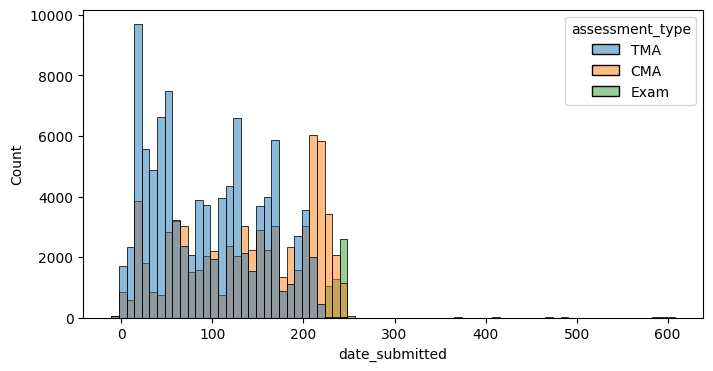

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=stud_assessments_with_type, x='date_submitted', bins=74, hue='assessment_type')

<Axes: xlabel='date_submitted', ylabel='Count'>

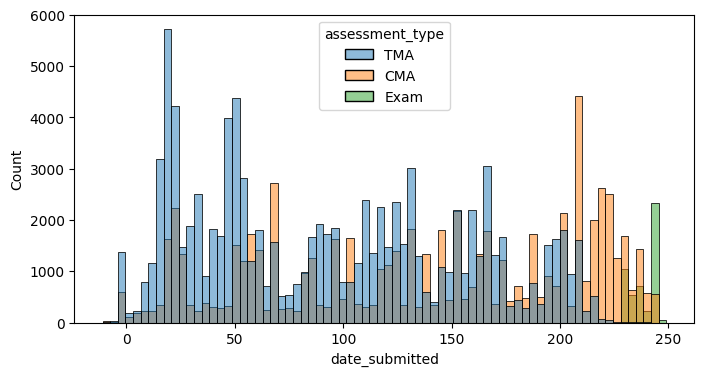

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=stud_assessments_with_type[stud_assessments_with_type.date_submitted < 250], x='date_submitted', bins=74, hue='assessment_type')

Есть случаи, когда дата сдачи < 0, то есть еще раньше, чем начался курс. Посмотрим что это за случаи:

In [ ]:
stud_assessments_with_type[stud_assessments_with_type.date_submitted < 0].date_submitted.unique()

array([ -1,  -4,  -5,  -3,  -6,  -2,  -9, -11,  -7, -10,  -8])

In [ ]:
stud_assessments_with_type[stud_assessments_with_type.date_submitted < 0].sample(10)

,id_assessment,id_student,date_submitted,is_banked,code_module,code_presentation,assessment_type,deadline,weight
35220,15015,478317,-1,1,BBB,2014B,CMA,47.0,1.0
56404,24293,608577,-1,1,CCC,2014J,TMA,158.0,22.0
16502,14997,431071,-1,1,BBB,2013J,TMA,47.0,18.0
32780,15011,545223,-1,1,BBB,2014B,TMA,117.0,18.0
123934,34878,483626,-1,1,FFF,2013J,CMA,236.0,0.0
132489,34886,608864,-1,1,FFF,2014B,TMA,24.0,12.5
126496,34880,405314,-1,1,FFF,2013J,CMA,236.0,0.0
2548,1760,415969,-1,1,AAA,2014J,TMA,117.0,20.0
146736,34901,492557,-1,1,FFF,2014J,TMA,94.0,25.0
133164,34886,77998,-1,1,FFF,2014B,TMA,24.0,12.5


Часто date_submitted = -1 сопряжон с флагом is_banked = 1, это, судя по описанию означает, что оценки были перенесены с прошлого курса. При этом есть случаи, где date_submitted = -1 и is_banked = 1 не совпадают:

In [ ]:
stud_assessments_with_type[(stud_assessments_with_type.date_submitted == -1) & (stud_assessments_with_type.is_banked != 1)]

,id_assessment,id_student,date_submitted,is_banked,code_module,code_presentation,assessment_type,deadline,weight
29017,15008,614117,-1,0,BBB,2014B,TMA,12.0,5.0
29076,15008,618197,-1,0,BBB,2014B,TMA,12.0,5.0
29551,15008,2334930,-1,0,BBB,2014B,TMA,12.0,5.0
38781,15020,653762,-1,0,BBB,2014J,TMA,19.0,0.0
39490,15020,2276854,-1,0,BBB,2014J,TMA,19.0,0.0
39722,15020,373846,-1,0,BBB,2014J,TMA,19.0,0.0
40310,15020,640291,-1,0,BBB,2014J,TMA,19.0,0.0
109447,34865,2000491,-1,0,FFF,2013B,CMA,222.0,0.0
110431,34865,558018,-1,0,FFF,2013B,CMA,222.0,0.0
150139,34904,689832,-1,0,FFF,2014J,CMA,241.0,0.0


In [ ]:
stud_assessments_with_type[(stud_assessments_with_type.date_submitted != -1) & (stud_assessments_with_type.is_banked == 1)]

,id_assessment,id_student,date_submitted,is_banked,code_module,code_presentation,assessment_type,deadline,weight


Есть случаи, где date_submitted = -1, но is_banked = 0, но нет обратных случаев. Такие ситуации, судя по всему, относятся к следующим случаям, когда дата сдачи < -1:

In [ ]:
stud_assessments_with_type[stud_assessments_with_type.date_submitted < -1].sample(10)

,id_assessment,id_student,date_submitted,is_banked,code_module,code_presentation,assessment_type,deadline,weight
151325,34905,598540,-2,0,FFF,2014J,CMA,241.0,0.0
151088,34904,646540,-2,0,FFF,2014J,CMA,241.0,0.0
39184,15020,689487,-3,0,BBB,2014J,TMA,19.0,0.0
109951,34865,505315,-8,0,FFF,2013B,CMA,222.0,0.0
29274,15008,628176,-5,0,BBB,2014B,TMA,12.0,5.0
29214,15008,625713,-7,0,BBB,2014B,TMA,12.0,5.0
39040,15020,683742,-3,0,BBB,2014J,TMA,19.0,0.0
110193,34865,541521,-3,0,FFF,2013B,CMA,222.0,0.0
150900,34904,625802,-2,0,FFF,2014J,CMA,241.0,0.0
40340,15020,643953,-5,0,BBB,2014J,TMA,19.0,0.0


Посмотрим на примеры:

In [ ]:
stud_assessments_with_type[stud_assessments_with_type.id_student == 614117]

,id_assessment,id_student,date_submitted,is_banked,code_module,code_presentation,assessment_type,deadline,weight
29017,15008,614117,-1,0,BBB,2014B,TMA,12.0,5.0
30518,15009,614117,37,0,BBB,2014B,TMA,40.0,18.0
31616,15010,614117,80,0,BBB,2014B,TMA,82.0,18.0
32144,15011,614117,116,0,BBB,2014B,TMA,117.0,18.0
33196,15012,614117,152,0,BBB,2014B,TMA,152.0,18.0
34010,15013,614117,193,0,BBB,2014B,TMA,194.0,18.0
34495,15015,614117,49,0,BBB,2014B,CMA,47.0,1.0
35831,15016,614117,84,0,BBB,2014B,CMA,82.0,1.0
36845,15017,614117,119,0,BBB,2014B,CMA,117.0,1.0
37349,15018,614117,154,0,BBB,2014B,CMA,152.0,1.0


In [ ]:
stud_assessments_with_type[(stud_assessments_with_type.id_student == 443696) & (stud_assessments_with_type.code_presentation == '2013B')]

,id_assessment,id_student,date_submitted,is_banked,code_module,code_presentation,assessment_type,deadline,weight
104467,34860,443696,19,0,FFF,2013B,TMA,19.0,12.5
105567,34861,443696,46,0,FFF,2013B,TMA,47.0,12.5
106909,34862,443696,97,0,FFF,2013B,TMA,89.0,25.0
107972,34863,443696,157,0,FFF,2013B,TMA,131.0,25.0
108750,34864,443696,166,0,FFF,2013B,TMA,166.0,25.0
109841,34865,443696,-8,0,FFF,2013B,CMA,222.0,0.0
110930,34866,443696,-8,0,FFF,2013B,CMA,222.0,0.0
111752,34867,443696,59,0,FFF,2013B,CMA,222.0,0.0
112822,34868,443696,105,0,FFF,2013B,CMA,222.0,0.0
113764,34869,443696,133,0,FFF,2013B,CMA,222.0,0.0


Это не выглядит как ошибка, возможно это говорит о том, что студент очень заинтересован в курсе, или имеет знания по теме еще до изучения материалов. Оставим как есть.

Посмотрим снова на случаи, когда оценки были перенесены:

In [ ]:
stud_assessments_with_type[stud_assessments_with_type.is_banked == 1]

,id_assessment,id_student,date_submitted,is_banked,code_module,code_presentation,assessment_type,deadline,weight
1641,1758,603861,-1,1,AAA,2014J,TMA,19.0,10.0
1685,1758,1970390,-1,1,AAA,2014J,TMA,19.0,10.0
1690,1758,2073016,-1,1,AAA,2014J,TMA,19.0,10.0
1693,1758,2139353,-1,1,AAA,2014J,TMA,19.0,10.0
1708,1758,2358969,-1,1,AAA,2014J,TMA,19.0,10.0
...,...,...,...,...,...,...,...,...,...
172516,37440,624767,-1,1,GGG,2014J,CMA,229.0,0.0
172526,37440,631446,-1,1,GGG,2014J,CMA,229.0,0.0
172717,37441,624767,-1,1,GGG,2014J,CMA,229.0,0.0
172727,37441,631446,-1,1,GGG,2014J,CMA,229.0,0.0


Рассмотрим несколько примеров по отдельным студентам:

In [ ]:
stud_assessments_with_type[stud_assessments_with_type.id_student == 603861]

,id_assessment,id_student,date_submitted,is_banked,code_module,code_presentation,assessment_type,deadline,weight
211,1752,603861,19,0,AAA,2013J,TMA,19.0,10.0
699,1753,603861,59,0,AAA,2013J,TMA,54.0,20.0
707,1754,603861,117,0,AAA,2013J,TMA,117.0,20.0
1209,1755,603861,174,0,AAA,2013J,TMA,166.0,20.0
1632,1756,603861,222,0,AAA,2013J,TMA,215.0,30.0
1641,1758,603861,-1,1,AAA,2014J,TMA,19.0,10.0
2184,1759,603861,-1,1,AAA,2014J,TMA,54.0,20.0
2585,1760,603861,-1,1,AAA,2014J,TMA,117.0,20.0
2599,1761,603861,-1,1,AAA,2014J,TMA,166.0,20.0
3065,1762,603861,-1,1,AAA,2014J,TMA,215.0,30.0


Здесь почти все задания сданы после дедлайна, это значит, что студент мог не набрать досточное количество данных, чтобы успешно закончить курс, и поэтому он был вынужден проходить его снова.

In [ ]:
stud_assessments_with_type[stud_assessments_with_type.id_student == 2073016]

,id_assessment,id_student,date_submitted,is_banked,code_module,code_presentation,assessment_type,deadline,weight
260,1752,2073016,23,0,AAA,2013J,TMA,19.0,10.0
403,1753,2073016,54,0,AAA,2013J,TMA,54.0,20.0
749,1754,2073016,139,0,AAA,2013J,TMA,117.0,20.0
1690,1758,2073016,-1,1,AAA,2014J,TMA,19.0,10.0
2226,1759,2073016,-1,1,AAA,2014J,TMA,54.0,20.0
2319,1760,2073016,-1,1,AAA,2014J,TMA,117.0,20.0
3099,1762,2073016,215,0,AAA,2014J,TMA,215.0,30.0


Похожая ситуация, здесь было выполнено мало заданий, не пройден курс, оценки перенесы и сделано еще одно задание в новом семестре.

In [ ]:
stud_assessments_with_type[stud_assessments_with_type.id_student == 624767]

,id_assessment,id_student,date_submitted,is_banked,code_module,code_presentation,assessment_type,deadline,weight
164917,37425,624767,43,0,GGG,2014B,TMA,61.0,0.0
165677,37426,624767,114,0,GGG,2014B,TMA,117.0,0.0
166274,37427,624767,165,0,GGG,2014B,TMA,166.0,0.0
166712,37428,624767,80,0,GGG,2014B,CMA,222.0,0.0
167393,37429,624767,151,0,GGG,2014B,CMA,222.0,0.0
167959,37430,624767,147,0,GGG,2014B,CMA,222.0,0.0
168367,37431,624767,192,0,GGG,2014B,CMA,222.0,0.0
168953,37432,624767,192,0,GGG,2014B,CMA,222.0,0.0
169589,37435,624767,-1,1,GGG,2014J,TMA,61.0,0.0
170244,37436,624767,-1,1,GGG,2014J,TMA,124.0,0.0


Здесь дедлайн был соблюден, но, возможно, в самих задниях было набрано слишком мало баллов.

Обязательно сохраним этот флаг, он может говорить о том, что имеющие его студенты в среднем неберу меньше баллов, чем студенты без него. Сохраним его = 1, если есть хотябы одно перенесенное задение, и 0, если нет ни одного.

Рассмотрим дальше возможные типы заданий. Как уже было видно, их 3, и пропущенных значений нет:

In [ ]:
stud_assessments_with_type.assessment_type.unique()

array(['TMA', 'CMA', 'Exam'], dtype=object)

In [ ]:
stud_assessments_with_type.assessment_type.value_counts()

TMA     98426
CMA     70527
Exam     4959
Name: assessment_type, dtype: int64

При этом по отедельным примерам уже можно было видеть, что экзамен, кажется,  существует не во всех всех курсах, либо некоторые студенты до него просто не добираются. Посмотрим, так ли это:

In [ ]:
stud_assessments_with_type.groupby(['code_module', 'code_presentation', 'assessment_type']).size()

code_module  code_presentation  assessment_type
AAA          2013J              TMA                1633
             2014J              TMA                1516
BBB          2013B              CMA                5049
                                TMA                6207
             2013J              CMA                6416
                                                   ... 
GGG          2013J              TMA                2201
             2014B              CMA                3063
                                TMA                1833
             2014J              CMA                2747
                                TMA                1626
Length: 41, dtype: int64

Видно, что есть курсы, где нет ни только экзамена, но и, например, CMA.

Теперь посмотрим на веса оценок заданий. По описанию, если выполнены все задания, то их сумма должна быть 100 (кроме экзамена):

In [ ]:
stud_assessments_with_type

,id_assessment,id_student,date_submitted,is_banked,code_module,code_presentation,assessment_type,deadline,weight
0,1752,11391,18,0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,AAA,2013J,TMA,19.0,10.0
...,...,...,...,...,...,...,...,...,...
173907,37443,527538,227,0,GGG,2014J,CMA,229.0,0.0
173908,37443,534672,229,0,GGG,2014J,CMA,229.0,0.0
173909,37443,546286,215,0,GGG,2014J,CMA,229.0,0.0
173910,37443,546724,230,0,GGG,2014J,CMA,229.0,0.0


<Axes: xlabel='weight', ylabel='Count'>

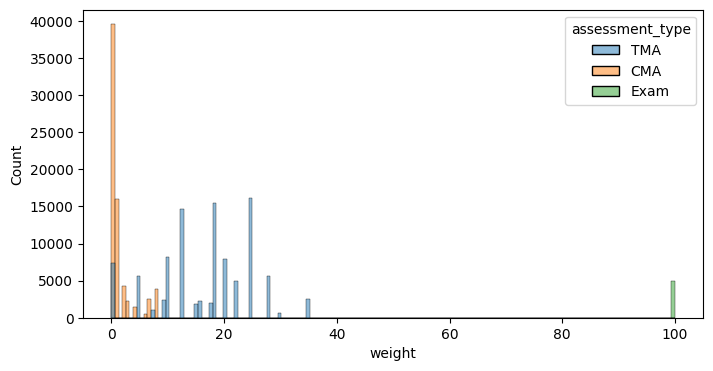

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=stud_assessments_with_type, x='weight', hue='assessment_type')

<Axes: xlabel='weight', ylabel='Count'>

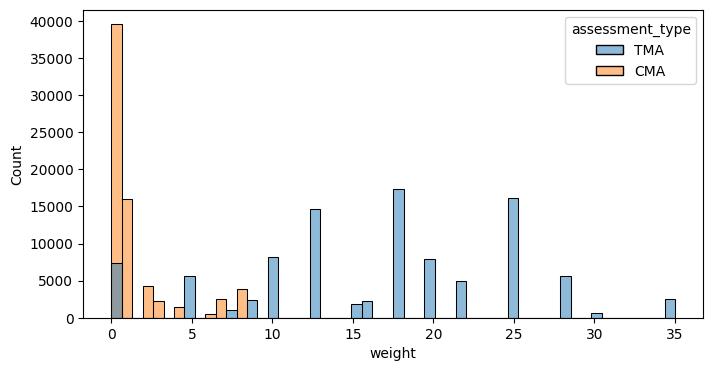

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=stud_assessments_with_type[stud_assessments_with_type.assessment_type != 'Exam'], x='weight', hue='assessment_type')

Задания, оцениваемые преподавалям в среднем весят сильно больше, что логично. При этом очень много случаев, когда задания вообще не оцениваются.

Посмотрим, есть ли такие курсы, где вообще нет оцениваемых заданий:

In [ ]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [ ]:
buf_table = assessments.groupby(['code_module', 'code_presentation']).weight.sum()
print(buf_table[buf_table <= 100])
print('\n')
print(buf_table[buf_table > 100])

code_module  code_presentation
GGG          2013J                100.0
             2014B                100.0
             2014J                100.0
Name: weight, dtype: float64


code_module  code_presentation
AAA          2013J                200.0
             2014J                200.0
BBB          2013B                200.0
             2013J                200.0
             2014B                200.0
             2014J                200.0
CCC          2014B                300.0
             2014J                300.0
DDD          2013B                200.0
             2013J                200.0
             2014B                200.0
             2014J                200.0
EEE          2013J                200.0
             2014B                200.0
             2014J                200.0
FFF          2013B                200.0
             2013J                200.0
             2014B                200.0
             2014J                200.0
Name: weight, dtype: float6

In [ ]:
assessments.groupby(['code_module', 'code_presentation', 'assessment_type']).weight.sum()

code_module  code_presentation  assessment_type
AAA          2013J              Exam               100.0
                                TMA                100.0
             2014J              Exam               100.0
                                TMA                100.0
BBB          2013B              CMA                  5.0
                                                   ...  
GGG          2014B              Exam               100.0
                                TMA                  0.0
             2014J              CMA                  0.0
                                Exam               100.0
                                TMA                  0.0
Name: weight, Length: 57, dtype: float64

Получается, что нет курсов, где не было бы хотябы каких-то оценок. Есть и курсы, где сумма весов = 300.

Также эта информация пока идет в разрез с увиденным ранее, потому что мы видели, что в некоторых курсах, например, модуль AAA, презентация 2013J, существуют задания только типа TMA:

In [ ]:
module = stud_assessments_with_type.code_module == 'AAA'
pres = stud_assessments_with_type.code_presentation == '2013J'

stud_assessments_with_type[module & pres].assessment_type.unique()

array(['TMA'], dtype=object)

In [ ]:
module = assessments.code_module == 'AAA'
pres = assessments.code_presentation == '2013J'

assessments[module & pres]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0


Получается, что CMA или TMA может не быть. При этом в курсае есть экзамен, но ни один из студентов его не сдавал.

Посмотрим, во всех ли курсах есть экзамен:

In [ ]:
assessments[assessments.assessment_type == 'Exam'][['code_module', 'code_presentation']].to_numpy()

array([['AAA', '2013J'],
       ['AAA', '2014J'],
       ['BBB', '2013B'],
       ['BBB', '2013J'],
       ['BBB', '2014B'],
       ['BBB', '2014J'],
       ['CCC', '2014B'],
       ['CCC', '2014B'],
       ['CCC', '2014J'],
       ['CCC', '2014J'],
       ['DDD', '2013B'],
       ['DDD', '2013J'],
       ['DDD', '2014B'],
       ['DDD', '2014J'],
       ['EEE', '2013J'],
       ['EEE', '2014B'],
       ['EEE', '2014J'],
       ['FFF', '2013B'],
       ['FFF', '2013J'],
       ['FFF', '2014B'],
       ['FFF', '2014J'],
       ['GGG', '2013J'],
       ['GGG', '2014B'],
       ['GGG', '2014J']], dtype=object)

Посмортим на курс, где сумма весов = 300:

In [ ]:
assessments[assessments.code_module == 'CCC'].groupby(['code_module', 'code_presentation', 'assessment_type']).weight.sum()

code_module  code_presentation  assessment_type
CCC          2014B              CMA                 25.0
                                Exam               200.0
                                TMA                 75.0
             2014J              CMA                 25.0
                                Exam               200.0
                                TMA                 75.0
Name: weight, dtype: float64

In [ ]:
assessments[(assessments.code_module == 'CCC') & (assessments.assessment_type == 'Exam')]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


Почему-то в данном случае одновременно существуют сразу два экзамена. Посмотрим, действительно ли студенты решали сразу два эказмена:

In [ ]:
module = stud_assessments_with_type.code_module == 'CCC'
pres = stud_assessments_with_type.code_presentation.isin(['2014B', '2014J'])
id_assessment = ((stud_assessments_with_type.id_assessment == 24290) | (stud_assessments_with_type.id_assessment == 40087) | \
                (stud_assessments_with_type.id_assessment == 24299) | (stud_assessments_with_type.id_assessment == 40088))

selection = stud_assessments_with_type[module & pres & id_assessment]

print(selection.id_assessment.unique())
selection.sample(5)

[24290 24299]


,id_assessment,id_student,date_submitted,is_banked,code_module,code_presentation,assessment_type,deadline,weight
64162,24299,605540,245,0,CCC,2014J,Exam,269.0,100.0
53431,24290,260949,234,0,CCC,2014B,Exam,241.0,100.0
53330,24290,2239848,234,0,CCC,2014B,Exam,241.0,100.0
64968,24299,433794,244,0,CCC,2014J,Exam,269.0,100.0
53535,24290,471979,230,0,CCC,2014B,Exam,241.0,100.0


Получается, что студенты сдавали только один экзамен. Посмотрим на оценки по этому курсу:

In [ ]:
train_base[train_base.id_student.isin([655890, 577414, 545747, 427413, 283798])]

,ID,id_student,code_module,code_presentation,weighted_score
414,414,577414,DDD,2013J,75.3375
7555,7555,655890,CCC,2014J,96.6800
8379,8379,577414,CCC,2014B,74.2450
20919,20919,545747,CCC,2014B,68.0850
22060,22060,427413,EEE,2013J,93.0000
22106,22106,427413,CCC,2014J,52.4850


Учитывая, что из них есть достаточно высокие, логично предположить, что второй экзамен просто не писался.

Удалим два лишних экзамена из данных:

In [ ]:
assessments = assessments.drop(assessments[assessments.id_assessment.isin([40087, 40088])].index)
assessments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        204 non-null    object 
 1   code_presentation  204 non-null    object 
 2   id_assessment      204 non-null    int64  
 3   assessment_type    204 non-null    object 
 4   date               195 non-null    float64
 5   weight             204 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.2+ KB


Посмотрим теперь на курсы, где 100:

In [ ]:
assessments[assessments.code_module == 'GGG'].groupby(['code_module', 'code_presentation', 'assessment_type']).weight.sum()

code_module  code_presentation  assessment_type
GGG          2013J              CMA                  0.0
                                Exam               100.0
                                TMA                  0.0
             2014B              CMA                  0.0
                                Exam               100.0
                                TMA                  0.0
             2014J              CMA                  0.0
                                Exam               100.0
                                TMA                  0.0
Name: weight, dtype: float64

Здесь все задания, кроме экзамена, имеют вес 0.

Посмотрим, решали ли экзамен студенты этих курсов:

In [ ]:
module = stud_assessments_with_type.code_module == 'GGG'

stud_assessments_with_type[module].assessment_type.unique()

array(['TMA', 'CMA'], dtype=object)

In [ ]:
stud_assessments_with_type[module & stud_assessments_with_type.assessment_type == 'Exam']

,id_assessment,id_student,date_submitted,is_banked,code_module,code_presentation,assessment_type,deadline,weight


Никто не решал. Посмотрим, какие могли получиться итоговые оценки в таком случае:

In [ ]:
train_base[(train_base.code_module=='GGG') & (train_base.weighted_score > 90)]

,ID,id_student,code_module,code_presentation,weighted_score
772,772,92103,GGG,2014J,93.5000
985,985,696514,GGG,2014J,94.3333
1246,1246,609365,GGG,2014B,92.0000
2105,2105,689554,GGG,2014J,95.0100
2454,2454,688856,GGG,2014J,95.3750
...,...,...,...,...,...
17856,17856,2214722,GGG,2014J,91.0000
21258,21258,586524,GGG,2013J,98.1200
21686,21686,629960,GGG,2014B,92.0000
23207,23207,636718,GGG,2014J,90.3200


In [ ]:
stud_assessments_with_type[stud_assessments_with_type.id_student == 592880]

,id_assessment,id_student,date_submitted,is_banked,code_module,code_presentation,assessment_type,deadline,weight
158993,37415,592880,61,0,GGG,2013J,TMA,61.0,0.0
159913,37416,592880,119,0,GGG,2013J,TMA,124.0,0.0


In [ ]:
stud_assessments_with_type[stud_assessments_with_type.id_student == 595335]

,id_assessment,id_student,date_submitted,is_banked,code_module,code_presentation,assessment_type,deadline,weight
159025,37415,595335,51,0,GGG,2013J,TMA,61.0,0.0
159945,37416,595335,123,0,GGG,2013J,TMA,124.0,0.0
160695,37417,595335,171,0,GGG,2013J,TMA,173.0,0.0
161200,37418,595335,108,0,GGG,2013J,CMA,229.0,0.0
162055,37419,595335,136,0,GGG,2013J,CMA,229.0,0.0
162765,37420,595335,158,0,GGG,2013J,CMA,229.0,0.0
163225,37421,595335,200,0,GGG,2013J,CMA,229.0,0.0
163963,37422,595335,207,0,GGG,2013J,CMA,229.0,0.0


Если студенты все же получили какие-то баллы, и при этом не решали экзамен, то какие-то веса у заданий, которые они выполняли, должны быть. Также в описании к данным сказано, что задания курса имеют вес, и сумма заданий должна быть равна 100. Значит в данном случае, похоже, существует ошибка в весах заданий. При этом и в данном случае, похоже, должны быть данные по экзаменам, так как баллы у студентов есть очень высокие.

Посмотрим, существуют ли еще курсы, где веса каких-то заданий = 0:

In [ ]:
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


Получается, что существуют. Например CMA в модуле FFF. При сумма остальных задайни = 100. Значит это нормально.

Преобразуем датасет assessments. Посчитаем количество заданий каждого типа и суммарный вес заданий, который можно получить, выполнив все задания одного типа из презентации.

Используем количество заданий каждого типа для того, чтобы рассчитать вес задания, если он = 0 (там, где, все задания имеют вес = 0, и даже там, где сумма весов = 100, из предположения, что все выполненные задания повышают оценку студента, пусть и не напрямую в данном случае), для того, чтобы далее рассчитать отношение выполненных студентом заданий, к доступным вообще. Вес заданий и суммарный вес используем, чтобы найти долю весов, которые получил студент.

In [ ]:
num_assesments_types_dict = assessments.groupby(['code_module', 'code_presentation', 'assessment_type'], as_index=False).size()
sum_weight_assesments_types_dict = assessments.groupby(['code_module', 'code_presentation', 'assessment_type'], as_index=False).weight.sum()

num_assesments_types_dict = num_assesments_types_dict.rename(columns={'size': 'type_num'})
sum_weight_assesments_types_dict = sum_weight_assesments_types_dict.rename(columns={'weight': 'weight_sum_by_type'})

assessments = pd.merge(left=assessments, right=num_assesments_types_dict, on=['code_module', 'code_presentation', 'assessment_type'], how='left')
assessments = pd.merge(left=assessments, right=sum_weight_assesments_types_dict, on=['code_module', 'code_presentation', 'assessment_type'], how='left')

assessments[(assessments.code_module == 'DDD') & (assessments.code_presentation == '2013B')]

,code_module,code_presentation,id_assessment,assessment_type,date,weight,type_num,weight_sum_by_type
72,DDD,2013B,25341,CMA,23.0,2.0,7,25.0
73,DDD,2013B,25342,CMA,51.0,3.0,7,25.0
74,DDD,2013B,25343,CMA,79.0,3.0,7,25.0
75,DDD,2013B,25344,CMA,114.0,4.0,7,25.0
76,DDD,2013B,25345,CMA,149.0,4.0,7,25.0
77,DDD,2013B,25346,CMA,170.0,3.0,7,25.0
78,DDD,2013B,25347,CMA,206.0,6.0,7,25.0
79,DDD,2013B,25334,TMA,25.0,7.5,6,75.0
80,DDD,2013B,25335,TMA,53.0,10.0,6,75.0
81,DDD,2013B,25336,TMA,81.0,12.5,6,75.0


In [ ]:
assessments[(assessments.code_module == 'GGG') & (assessments.code_presentation == '2013J')]

,code_module,code_presentation,id_assessment,assessment_type,date,weight,type_num,weight_sum_by_type
174,GGG,2013J,37418,CMA,229.0,0.0,6,0.0
175,GGG,2013J,37419,CMA,229.0,0.0,6,0.0
176,GGG,2013J,37420,CMA,229.0,0.0,6,0.0
177,GGG,2013J,37421,CMA,229.0,0.0,6,0.0
178,GGG,2013J,37422,CMA,229.0,0.0,6,0.0
179,GGG,2013J,37423,CMA,229.0,0.0,6,0.0
180,GGG,2013J,37415,TMA,61.0,0.0,3,0.0
181,GGG,2013J,37416,TMA,124.0,0.0,3,0.0
182,GGG,2013J,37417,TMA,173.0,0.0,3,0.0
183,GGG,2013J,37424,Exam,229.0,100.0,1,100.0


In [ ]:
condition = (assessments.weight / assessments.weight_sum_by_type).notna()
solution = assessments.weight / assessments.weight_sum_by_type
alter_solution = 1 / assessments.type_num

assessments['ratio_weight'] = np.where(condition, solution, alter_solution)

assessments[(assessments.code_module == 'GGG') & (assessments.code_presentation == '2013J')]

,code_module,code_presentation,id_assessment,assessment_type,date,weight,type_num,weight_sum_by_type,ratio_weight
174,GGG,2013J,37418,CMA,229.0,0.0,6,0.0,0.1667
175,GGG,2013J,37419,CMA,229.0,0.0,6,0.0,0.1667
176,GGG,2013J,37420,CMA,229.0,0.0,6,0.0,0.1667
177,GGG,2013J,37421,CMA,229.0,0.0,6,0.0,0.1667
178,GGG,2013J,37422,CMA,229.0,0.0,6,0.0,0.1667
179,GGG,2013J,37423,CMA,229.0,0.0,6,0.0,0.1667
180,GGG,2013J,37415,TMA,61.0,0.0,3,0.0,0.3333
181,GGG,2013J,37416,TMA,124.0,0.0,3,0.0,0.3333
182,GGG,2013J,37417,TMA,173.0,0.0,3,0.0,0.3333
183,GGG,2013J,37424,Exam,229.0,100.0,1,100.0,1.0000


In [ ]:
assessments[(assessments.code_module == 'DDD') & (assessments.code_presentation == '2013B')]

,code_module,code_presentation,id_assessment,assessment_type,date,weight,type_num,weight_sum_by_type,ratio_weight
72,DDD,2013B,25341,CMA,23.0,2.0,7,25.0,0.0800
73,DDD,2013B,25342,CMA,51.0,3.0,7,25.0,0.1200
74,DDD,2013B,25343,CMA,79.0,3.0,7,25.0,0.1200
75,DDD,2013B,25344,CMA,114.0,4.0,7,25.0,0.1600
76,DDD,2013B,25345,CMA,149.0,4.0,7,25.0,0.1600
77,DDD,2013B,25346,CMA,170.0,3.0,7,25.0,0.1200
78,DDD,2013B,25347,CMA,206.0,6.0,7,25.0,0.2400
79,DDD,2013B,25334,TMA,25.0,7.5,6,75.0,0.1000
80,DDD,2013B,25335,TMA,53.0,10.0,6,75.0,0.1333
81,DDD,2013B,25336,TMA,81.0,12.5,6,75.0,0.1667


In [ ]:
stud_assessments_add = pd.merge(left=stud_assessments_with_type, \
                                      right=assessments[['code_module', 'code_presentation', 'id_assessment', 'type_num', 'ratio_weight']], \
                                      on=['code_module', 'code_presentation', 'id_assessment'], how='left')

stud_assessments_add[stud_assessments_with_type.id_student == 529065]

,id_assessment,id_student,date_submitted,is_banked,code_module,code_presentation,assessment_type,deadline,weight,type_num,ratio_weight
3900,14984,529065,19,0,BBB,2013B,TMA,19.0,5.0,6,0.0526
5241,14985,529065,47,0,BBB,2013B,TMA,47.0,18.0,6,0.1895
6198,14986,529065,89,0,BBB,2013B,TMA,89.0,18.0,6,0.1895
7291,14987,529065,124,0,BBB,2013B,TMA,124.0,18.0,6,0.1895
8252,14988,529065,162,0,BBB,2013B,TMA,159.0,18.0,6,0.1895
8929,14989,529065,191,0,BBB,2013B,TMA,187.0,18.0,6,0.1895
10021,14991,529065,60,0,BBB,2013B,CMA,54.0,1.0,5,0.2000
11191,14992,529065,95,0,BBB,2013B,CMA,89.0,1.0,5,0.2000
12060,14993,529065,126,0,BBB,2013B,CMA,124.0,1.0,5,0.2000
13116,14994,529065,164,0,BBB,2013B,CMA,159.0,1.0,5,0.2000


Рассчитаем также "скорость" выполнения студентом заданий курса, из предположения, что более подготовленные студенты, будут решать задания в среднем быстрее.

In [ ]:
stud_assessments_add['stud_speed'] = stud_assessments_add.deadline - stud_assessments_add.date_submitted

stud_assessments_add[stud_assessments_with_type.id_student == 529065]

,id_assessment,id_student,date_submitted,is_banked,code_module,code_presentation,assessment_type,deadline,weight,type_num,ratio_weight,stud_speed
3900,14984,529065,19,0,BBB,2013B,TMA,19.0,5.0,6,0.0526,0.0
5241,14985,529065,47,0,BBB,2013B,TMA,47.0,18.0,6,0.1895,0.0
6198,14986,529065,89,0,BBB,2013B,TMA,89.0,18.0,6,0.1895,0.0
7291,14987,529065,124,0,BBB,2013B,TMA,124.0,18.0,6,0.1895,0.0
8252,14988,529065,162,0,BBB,2013B,TMA,159.0,18.0,6,0.1895,-3.0
8929,14989,529065,191,0,BBB,2013B,TMA,187.0,18.0,6,0.1895,-4.0
10021,14991,529065,60,0,BBB,2013B,CMA,54.0,1.0,5,0.2000,-6.0
11191,14992,529065,95,0,BBB,2013B,CMA,89.0,1.0,5,0.2000,-6.0
12060,14993,529065,126,0,BBB,2013B,CMA,124.0,1.0,5,0.2000,-2.0
13116,14994,529065,164,0,BBB,2013B,CMA,159.0,1.0,5,0.2000,-5.0


Исключим id заданий и рассчитаем отношение, показывающее полноту выполнения заданий студентом:

In [ ]:
buf_table = stud_assessments_add.groupby(['id_student', 'code_module', 'code_presentation', 'assessment_type'], as_index=False).size()

stud_assessments_full = pd.merge(left=stud_assessments_add, right=buf_table, \
                                on=['id_student', 'code_module', 'code_presentation', 'assessment_type'], how='left')

stud_assessments_full['complete_ratio'] = stud_assessments_full['size'] / stud_assessments_full.type_num

use_columns = ['id_assessment', 'id_student', 'is_banked', 'code_module', 'code_presentation', \
                'assessment_type', 'complete_ratio', 'ratio_weight', 'stud_speed']

stud_assessments_full = stud_assessments_full[use_columns]

stud_assessments_full[stud_assessments_full.id_student == 529065]

,id_assessment,id_student,is_banked,code_module,code_presentation,assessment_type,complete_ratio,ratio_weight,stud_speed
3900,14984,529065,0,BBB,2013B,TMA,1.0,0.0526,0.0
5241,14985,529065,0,BBB,2013B,TMA,1.0,0.1895,0.0
6198,14986,529065,0,BBB,2013B,TMA,1.0,0.1895,0.0
7291,14987,529065,0,BBB,2013B,TMA,1.0,0.1895,0.0
8252,14988,529065,0,BBB,2013B,TMA,1.0,0.1895,-3.0
8929,14989,529065,0,BBB,2013B,TMA,1.0,0.1895,-4.0
10021,14991,529065,0,BBB,2013B,CMA,1.0,0.2000,-6.0
11191,14992,529065,0,BBB,2013B,CMA,1.0,0.2000,-6.0
12060,14993,529065,0,BBB,2013B,CMA,1.0,0.2000,-2.0
13116,14994,529065,0,BBB,2013B,CMA,1.0,0.2000,-5.0


In [ ]:
pivot_table = pd.pivot(data=stud_assessments_full, columns='assessment_type', values=['complete_ratio', 'ratio_weight', 'stud_speed'])

stud_assessments_pivot = pd.merge(left=stud_assessments_full, \
                                     right=pivot_table, how='left', left_index=True, right_index=True)

stud_assessments_pivot = stud_assessments_pivot.rename(columns={('complete_ratio', 'CMA'): 'CMA_complete_ratio',
                                                                ('complete_ratio', 'Exam'): 'Exam_complete_ratio',
                                                                ('complete_ratio', 'TMA'): 'TMA_complete_ratio',
                                                                ('ratio_weight', 'CMA'): 'CMA_ratio_weight',
                                                                ('ratio_weight', 'Exam'): 'Exam_ratio_weight',
                                                                ('ratio_weight', 'TMA'): 'TMA_ratio_weight',
                                                                ('stud_speed', 'CMA'): 'CMA_stud_speed',
                                                                ('stud_speed', 'Exam'): 'Exam_stud_speed',
                                                                ('stud_speed', 'TMA'): 'TMA_stud_speed'})

stud_assessments = stud_assessments_pivot.groupby(['id_student', 'code_module', 'code_presentation'], as_index=False) \
                                                  .agg({'is_banked': np.max,
                                                        'CMA_complete_ratio': np.mean, 'Exam_complete_ratio': np.mean, 'TMA_complete_ratio': np.mean,
                                                        'CMA_ratio_weight': np.sum, 'Exam_ratio_weight': np.sum, 'TMA_ratio_weight': np.sum,
                                                        'CMA_stud_speed': np.sum, 'Exam_stud_speed': np.sum, 'TMA_stud_speed': np.sum})

stud_assessments[stud_assessments.id_student == 529065]

<ipython-input-194-43e1915a991d>:3: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  stud_assessments_pivot = pd.merge(left=stud_assessments_full, \


,id_student,code_module,code_presentation,is_banked,CMA_complete_ratio,Exam_complete_ratio,TMA_complete_ratio,CMA_ratio_weight,Exam_ratio_weight,TMA_ratio_weight,CMA_stud_speed,Exam_stud_speed,TMA_stud_speed
7490,529065,BBB,2013B,0,1.0,NaN,1.0,1.0,0.0,1.0,-21.0,0.0,-7.0


In [ ]:
stud_assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25843 entries, 0 to 25842
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_student           25843 non-null  int64  
 1   code_module          25843 non-null  object 
 2   code_presentation    25843 non-null  object 
 3   is_banked            25843 non-null  int64  
 4   CMA_complete_ratio   15100 non-null  float64
 5   Exam_complete_ratio  4959 non-null   float64
 6   TMA_complete_ratio   24820 non-null  float64
 7   CMA_ratio_weight     25843 non-null  float64
 8   Exam_ratio_weight    25843 non-null  float64
 9   TMA_ratio_weight     25843 non-null  float64
 10  CMA_stud_speed       25843 non-null  float64
 11  Exam_stud_speed      25843 non-null  float64
 12  TMA_stud_speed       25843 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 2.6+ MB


Теперь откорректирум полученную таблицу.

Во-первых, поскольку данные о скорости выполнения заданий студентами с перенесенными баллами искажены, заменим их соответствующий показатель на 0.

Во-вторых, для случаев, когда студентам были доступны задания определенного типа, но они их не выполнели, проставим значния столбцов CMA_complete_ratio, Exam_complete_ratio и TMA_complete_ratio = 0.

В-третьих, для случаев, когда студентам не были достпны задания определенного типа, проставим значения CMA_complete_ratio, Exam_complete_ratio и TMA_complete_ratio, а также соответствующие им отношения весов = 1.

In [ ]:
def correct_stud_speed_for_banked(data, list_columns):

  for column in list_columns:
    data[column] = data[column].mask(data.is_banked == 1, 0)

  return data

In [ ]:
def fill_na_with_zeros(data, list_columns):

  for column in list_columns:
    for i in stud_assessments[stud_assessments[column].notna()][['code_module', 'code_presentation']].drop_duplicates().to_numpy():
      module = data.code_module == i[0]
      pres = data.code_presentation == i[1]
      data[column] = data[column].mask((data[column].isna()) & module & pres, 0)

  return data

In [ ]:
def fill_na_with_one(data, list_columns):

  for column in list_columns:
    for i in assessments[assessments.assessment_type == 'Exam'][['code_module', 'code_presentation']].drop_duplicates().to_numpy():
      module = data.code_module == i[0]
      pres = data.code_presentation == i[1]
      if column == 'CMA_complete_ratio':
        data['CMA_ratio_weight'] = data['CMA_ratio_weight'].mask((data[column].isna()) & module & pres, 1)
      if column == 'Exam_complete_ratio':
        data['Exam_ratio_weight'] = data['Exam_ratio_weight'].mask((data[column].isna()) & module & pres, 1)
      if column == 'TMA_complete_ratio':
        data['TMA_ratio_weight'] = data['TMA_ratio_weight'].mask((data[column].isna()) & module & pres, 1)
      data[column] = data[column].mask((data[column].isna()) & module & pres, 1)

  return data

In [ ]:
def fill_and_correct_data(data, list_column_for_speed, list_columns_for_grades):

  data = correct_stud_speed_for_banked(data, list_column_for_speed)
  data = fill_na_with_zeros(data, list_columns_for_grades)
  data = fill_na_with_one(data, list_columns_for_grades)

  return data

In [ ]:
list_column_for_speed = ['CMA_stud_speed', 'Exam_stud_speed', 'TMA_stud_speed']
list_columns_for_grades = ['CMA_complete_ratio', 'Exam_complete_ratio', 'TMA_complete_ratio']

stud_assessments = fill_and_correct_data(stud_assessments, list_column_for_speed, list_columns_for_grades)

In [ ]:
stud_assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25843 entries, 0 to 25842
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_student           25843 non-null  int64  
 1   code_module          25843 non-null  object 
 2   code_presentation    25843 non-null  object 
 3   is_banked            25843 non-null  int64  
 4   CMA_complete_ratio   25843 non-null  float64
 5   Exam_complete_ratio  25843 non-null  float64
 6   TMA_complete_ratio   25843 non-null  float64
 7   CMA_ratio_weight     25843 non-null  float64
 8   Exam_ratio_weight    25843 non-null  float64
 9   TMA_ratio_weight     25843 non-null  float64
 10  CMA_stud_speed       25843 non-null  float64
 11  Exam_stud_speed      25843 non-null  float64
 12  TMA_stud_speed       25843 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 2.6+ MB


In [ ]:
stud_assessments[stud_assessments.id_student == 529065]

,id_student,code_module,code_presentation,is_banked,CMA_complete_ratio,Exam_complete_ratio,TMA_complete_ratio,CMA_ratio_weight,Exam_ratio_weight,TMA_ratio_weight,CMA_stud_speed,Exam_stud_speed,TMA_stud_speed
7490,529065,BBB,2013B,0,1.0,1.0,1.0,1.0,1.0,1.0,-21.0,0.0,-7.0


###2.2.4 Информация о студентах

Обогатим информацию о пользователях из studentInfo, добавив туда информацю о дате регистрации из studentRegistration:

In [ ]:
students_info = pd.merge(left=studentInfo, right=studentRegistration
                          , on=['code_module', 'code_presentation', 'id_student'], how='left')
students_info.info()
students_info.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           32593 non-null  object 
 1   code_presentation     32593 non-null  object 
 2   id_student            32593 non-null  int64  
 3   gender                32593 non-null  object 
 4   region                32593 non-null  object 
 5   highest_education     32593 non-null  object 
 6   imd_band              31482 non-null  object 
 7   age_band              32593 non-null  object 
 8   num_of_prev_attempts  32593 non-null  int64  
 9   studied_credits       32593 non-null  int64  
 10  disability            32593 non-null  object 
 11  date_registration     32548 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 3.2+ MB


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date_registration
8934,CCC,2014B,368876,M,East Midlands Region,Lower Than A Level,90-100%,0-35,0,60,N,-29.0
6499,BBB,2014J,286338,F,South Region,Lower Than A Level,30-40%,35-55,0,60,N,-60.0
8618,BBB,2014J,2570396,F,South Region,A Level or Equivalent,70-80%,35-55,1,60,N,-157.0
29784,FFF,2014J,696043,F,South East Region,Lower Than A Level,60-70%,0-35,0,120,Y,-17.0
32517,GGG,2014J,694359,F,East Midlands Region,Lower Than A Level,50-60%,0-35,0,30,N,-2.0


Кое-где не хватает даты регистрации. Посмотрим на эти данные:

In [ ]:
students_info[students_info.date_registration.isna()].sample(5)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date_registration
18433,DDD,2014J,636590,F,West Midlands Region,A Level or Equivalent,0-10%,0-35,0,150,N,NaN
14393,DDD,2013B,2710343,M,North Western Region,Lower Than A Level,0-10%,0-35,0,60,N,NaN
13503,DDD,2013B,464615,M,East Anglian Region,Lower Than A Level,30-40%,0-35,0,120,N,NaN
14556,DDD,2013J,250456,F,East Anglian Region,A Level or Equivalent,80-90%,0-35,0,150,N,NaN
10388,CCC,2014B,1600062,M,Yorkshire Region,A Level or Equivalent,70-80%,35-55,0,90,N,NaN


С виду обычные данные. Посмотрим, влиеят ли как-то дата регистрации на итоговую оценку:

In [ ]:
pd.merge(left=students_info, right=train_base, on=['code_module', 'code_presentation', 'id_student'],
         how='right')[['date_registration', 'weighted_score']].corr()

,date_registration,weighted_score
date_registration,1.000,0.001
weighted_score,0.001,1.000


Нет, не влияет. Удалим этот столбец.

In [ ]:
students_info = students_info.drop(columns='date_registration')

Также нехватает данных imd_dand. Судя по описанию к данным это индекс, отражающий качество жизни человека. Чем выше, тем лучше. Зависит от социальных показателей человека, района проживания, образования и тд.

In [ ]:
students_info.imd_band.value_counts()

20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
Name: imd_band, dtype: int64

Посмотрим:

In [ ]:
students_info[students_info.imd_band.isna()].sample(5)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
10502,CCC,2014B,2389754,M,North Region,HE Qualification,NaN,35-55,0,60,N
16338,DDD,2014B,49119,M,Ireland,HE Qualification,NaN,0-35,0,90,N
27714,FFF,2014J,71159,M,North Region,Lower Than A Level,NaN,35-55,0,60,N
20297,EEE,2013J,611033,M,North Region,Post Graduate Qualification,NaN,35-55,0,30,N
24664,FFF,2013J,557012,M,West Midlands Region,A Level or Equivalent,NaN,0-35,0,60,N


В таких случаях найдем самую распространенную категорию по похожим характеристикам. Если данных для абсолютно похожих людей нет, то будем ослаблять условия:

In [ ]:
def find_imd(data):

  for id in data[data.imd_band.isna()].id_student:
    meta_condition = data.id_student == id

    gender = data.gender == data[meta_condition].gender.values[0]
    region = data.region == data[meta_condition].region.values[0]
    education = data.highest_education == data[meta_condition].highest_education.values[0]
    age = data.age_band == data[meta_condition].age_band.values[0]
    disability = data.disability == data[meta_condition].disability.values[0]

    imd_rate = data[disability & region & age & education & gender][['imd_band']].value_counts()

    if len(imd_rate) == 0:
      imd_rate = data[disability & region & age & education][['imd_band']].value_counts()
      if len(imd_rate) == 0:
        imd_rate = data[disability & region & age][['imd_band']].value_counts()
        if len(imd_rate) == 0:
          imd_rate = data[disability & region][['imd_band']].value_counts()
          if len(imd_rate) == 0:
            imd_rate = data[disability][['imd_band']].value_counts()
            imd = imd_rate.index[0][0]
          else:
            imd = imd_rate.index[0][0]
        else:
          imd = imd_rate.index[0][0]
      else:
        imd = imd_rate.index[0][0]
    else:
      imd = imd_rate.index[0][0]

    data.imd_band = data.imd_band.mask(meta_condition, imd)

  return data

In [ ]:
students_info = find_imd(students_info)

In [ ]:
students_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32593 entries, 0 to 32592
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              32593 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
dtypes: int64(3), object(8)
memory usage: 3.0+ MB


##2.3 Джойн таблиц

train датасет:

In [ ]:
train_stud = pd.merge(left=train_base, right=students_info,
                      on=['code_module', 'code_presentation', 'id_student'],
                      how='left')

train_assessments = pd.merge(left=train_stud, right=stud_assessments,
                      on=['code_module', 'code_presentation', 'id_student'],
                      how='left')

train = pd.merge(left=train_assessments, right=stud_site_interaction,
                 on=['code_module', 'code_presentation', 'id_student'],
                 how='left')

print(train.info())
train.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26074 entries, 0 to 26073
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             26074 non-null  int64  
 1   id_student                     26074 non-null  int64  
 2   code_module                    26074 non-null  object 
 3   code_presentation              26074 non-null  object 
 4   weighted_score                 26074 non-null  float64
 5   gender                         26074 non-null  object 
 6   region                         26074 non-null  object 
 7   highest_education              26074 non-null  object 
 8   imd_band                       26074 non-null  object 
 9   age_band                       26074 non-null  object 
 10  num_of_prev_attempts           26074 non-null  int64  
 11  studied_credits                26074 non-null  int64  
 12  disability                     26074 non-null 

,ID,id_student,code_module,code_presentation,weighted_score,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,is_banked,CMA_complete_ratio,...,sum_click_glossary,sum_click_homepage,sum_click_htmlactivity,sum_click_oucollaborate,sum_click_oucontent,sum_click_ouelluminate,sum_click_ouwiki,sum_click_page,sum_click_questionnaire,sum_click_quiz,sum_click_resource,sum_click_subpage,sum_click_url,sum_click_sharedsubpage,sum_click_repeatactivity
3967,3967,474495,DDD,2013J,79.20,M,South West Region,A Level or Equivalent,20-30%,0-35,0,60,N,0.0,1.00,...,0.0,188.0,0.0,1.0,256.0,0.0,150.0,0.0,0.0,0.0,64.0,218.0,25.0,0.0,0.0
13338,13338,582033,GGG,2014B,19.33,M,London Region,Lower Than A Level,50-60%,35-55,0,30,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109,1109,553943,EEE,2013J,33.44,M,East Anglian Region,A Level or Equivalent,60-70%,0-35,0,30,N,0.0,1.00,...,0.0,44.0,0.0,0.0,196.0,0.0,0.0,0.0,0.0,103.0,1.0,12.0,10.0,0.0,0.0
16339,16339,536736,CCC,2014J,0.44,M,London Region,HE Qualification,10-20,0-35,0,120,N,0.0,0.25,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,246.0,0.0,0.0,2.0,0.0,0.0
23375,23375,1728437,BBB,2013B,74.87,F,West Midlands Region,A Level or Equivalent,80-90%,35-55,0,120,N,0.0,1.00,...,0.0,120.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,86.0,51.0,108.0,6.0,0.0,0.0


test датасет:

In [ ]:
test_stud = pd.merge(left=Test_Who, right=students_info,
                     on=['code_module', 'code_presentation', 'id_student'],
                     how='left')

test_assessments = pd.merge(left=test_stud, right=stud_assessments,
                            on=['code_module', 'code_presentation', 'id_student'],
                            how='left')

test = pd.merge(left=test_assessments, right=stud_site_interaction,
                on=['code_module', 'code_presentation', 'id_student'],
                how='left')

print(test.info())
test.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6519 entries, 0 to 6518
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             6519 non-null   int64  
 1   id_student                     6519 non-null   int64  
 2   code_module                    6519 non-null   object 
 3   code_presentation              6519 non-null   object 
 4   gender                         6519 non-null   object 
 5   region                         6519 non-null   object 
 6   highest_education              6519 non-null   object 
 7   imd_band                       6519 non-null   object 
 8   age_band                       6519 non-null   object 
 9   num_of_prev_attempts           6519 non-null   int64  
 10  studied_credits                6519 non-null   int64  
 11  disability                     6519 non-null   object 
 12  is_banked                      5203 non-null   f

,ID,id_student,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,is_banked,CMA_complete_ratio,Exam_complete_ratio,...,sum_click_glossary,sum_click_homepage,sum_click_htmlactivity,sum_click_oucollaborate,sum_click_oucontent,sum_click_ouelluminate,sum_click_ouwiki,sum_click_page,sum_click_questionnaire,sum_click_quiz,sum_click_resource,sum_click_subpage,sum_click_url,sum_click_sharedsubpage,sum_click_repeatactivity
2256,28330,2182846,AAA,2013J,F,London Region,A Level or Equivalent,70-80%,35-55,0,60,N,0.0,1.0,1.0,...,0.0,586.0,0.0,0.0,1229.0,0.0,0.0,0.0,0.0,0.0,23.0,121.0,42.0,0.0,0.0
4285,30359,615001,GGG,2014B,F,Yorkshire Region,Lower Than A Level,0-10%,0-35,0,30,N,0.0,1.0,1.0,...,0.0,142.0,0.0,0.0,221.0,0.0,0.0,0.0,0.0,48.0,6.0,3.0,0.0,0.0,0.0
1917,27991,533458,FFF,2013B,M,North Western Region,A Level or Equivalent,0-10%,0-35,0,120,N,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,26075,543628,CCC,2014B,M,North Western Region,HE Qualification,0-10%,35-55,0,90,N,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5469,31543,592245,GGG,2013J,F,East Midlands Region,Lower Than A Level,0-10%,0-35,0,30,N,0.0,1.0,1.0,...,1.0,311.0,0.0,0.0,146.0,0.0,0.0,0.0,0.0,141.0,24.0,42.0,0.0,0.0,0.0


##3 Обогащение данных

И в train и в test не хватает существенной части данных. Заполним их средними значениями для каждого соответствующего модуля и презентации. Выберем использующиеся колонки:

In [ ]:
use_columns = ['code_module', 'code_presentation',
       'gender', 'region', 'highest_education', 'imd_band',
       'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability',
       'is_banked',
       'CMA_complete_ratio',
       'Exam_complete_ratio', 'TMA_complete_ratio',
       'CMA_ratio_weight',
       'Exam_ratio_weight', 'TMA_ratio_weight',
       'CMA_stud_speed',
       'Exam_stud_speed', 'TMA_stud_speed',
       'mat_seen_ratio_dataplus',
       'mat_seen_ratio_dualpane', 'mat_seen_ratio_externalquiz',
       'mat_seen_ratio_folder', 'mat_seen_ratio_forumng',
       'mat_seen_ratio_glossary', 'mat_seen_ratio_homepage',
       'mat_seen_ratio_htmlactivity', 'mat_seen_ratio_oucollaborate',
       'mat_seen_ratio_oucontent', 'mat_seen_ratio_ouelluminate',
       'mat_seen_ratio_ouwiki', 'mat_seen_ratio_page',
       'mat_seen_ratio_questionnaire', 'mat_seen_ratio_quiz',
       'mat_seen_ratio_resource', 'mat_seen_ratio_subpage',
       'mat_seen_ratio_url', 'mat_seen_ratio_sharedsubpage',
       'mat_seen_ratio_repeatactivity',
       'sum_click_dataplus',
       'sum_click_dualpane', 'sum_click_externalquiz', 'sum_click_folder',
       'sum_click_forumng', 'sum_click_glossary', 'sum_click_homepage',
       'sum_click_htmlactivity', 'sum_click_oucollaborate',
       'sum_click_oucontent', 'sum_click_ouelluminate', 'sum_click_ouwiki',
       'sum_click_page', 'sum_click_questionnaire', 'sum_click_quiz',
       'sum_click_resource', 'sum_click_subpage', 'sum_click_url',
       'sum_click_sharedsubpage', 'sum_click_repeatactivity']

In [ ]:
def fill(data):

  for col in use_columns[10:]:

    if col == 'is_banked':
      data[col] = data[col].mask(data[col].isna(), 0)
    else:

      meta_condition = data[col].isna()
      codes = data[meta_condition][['code_module', 'code_presentation']].drop_duplicates()

      for code in codes.values:

        code_module = data['code_module'] == code[0]
        code_pres = data['code_presentation'] == code[1]

        value = round(data[code_module & code_pres][col].mean(), 2)

        data[col] = data[col].mask(code_module & code_pres & meta_condition, value)

  return data

In [ ]:
train = fill(train)
test = fill(test)

#3 CatBoost

##3.1 Базовая модель

Используем в качестве модели CatBoost.

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Определим категориальные признаки:

In [ ]:
cat_col_train = np.where(train[use_columns].dtypes == np.object)[0]
cat_col_train

<ipython-input-218-453b1216f84e>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_col_train = np.where(train[use_columns].dtypes == np.object)[0]


array([0, 1, 2, 3, 4, 5, 6, 9])

In [ ]:
X = train[use_columns]
Y = train['weighted_score']

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

Базовый результат:

In [ ]:
cbr = CatBoostRegressor(iterations=1000,
                          depth=8,
                          learning_rate=0.03,
                          loss_function='RMSE',
                          random_seed=42)

train_pool = Pool(X_train, Y_train, cat_features=cat_col_train)
val_pool = Pool(X_val, Y_val, cat_features=cat_col_train)
test_pool = Pool(X_val, cat_features=cat_col_train)

cbr.fit(train_pool, logging_level='Silent', eval_set=val_pool, early_stopping_rounds=20)

preds = cbr.predict(test_pool)

mse = mean_squared_error(Y_val, preds)

print("MSE on test set: {:.4f}".format(mse))

MSE on test set: 261.5287


##3.2 Подбор гиперпараметров

Подберем наилучшие гиперпараметры:

In [ ]:
min_mae = math.inf
func_best = 0
n_best = 0
depth_best = 0

train_pool = Pool(X_train, Y_train, cat_features=cat_col_train)
val_pool = Pool(X_val, Y_val, cat_features=cat_col_train)
test_pool = Pool(X_val, cat_features=cat_col_train)

for func in ['RMSE']:
  for n in [500, 800, 1000, 1200]:
    for depth in [4, 5, 8, 10, 12]:
      for rate in [0.03]:

        params = {'iterations': n,
                  'depth': depth,
                  'learning_rate': rate,
                  'objective': func,
                  'random_seed': 42}

        cbr = CatBoostRegressor(**params)

        cbr.fit(train_pool, logging_level='Silent', eval_set=val_pool, early_stopping_rounds=20)

        mse = mean_squared_error(Y_val, cbr.predict(test_pool))

        print('Текущий тест: n_estimators = ', n, 'max_depth = ', depth, 'loss_func = ', func, 'learning_rate = ', rate)
        print("MSE on test set: {:.4f}".format(mse))
        print('\n----------------')

        if mse < min_mae:
          min_mae = mse

          func_best = func
          n_best = n
          depth_best = depth

print('Лучший набор гиперпараметров: n_estimators = ', n_best, 'max_depth = ', depth_best, 'loss_func = ', func_best, 'learning_rate = ', rate)

Текущий тест: n_estimators =  500 max_depth =  4 loss_func =  RMSE learning_rate =  0.03
MSE on test set: 263.0925

----------------
Текущий тест: n_estimators =  500 max_depth =  5 loss_func =  RMSE learning_rate =  0.03
MSE on test set: 261.6171

----------------
Текущий тест: n_estimators =  500 max_depth =  8 loss_func =  RMSE learning_rate =  0.03
MSE on test set: 261.5287

----------------
Текущий тест: n_estimators =  500 max_depth =  10 loss_func =  RMSE learning_rate =  0.03
MSE on test set: 261.1287

----------------
Текущий тест: n_estimators =  500 max_depth =  12 loss_func =  RMSE learning_rate =  0.03
MSE on test set: 262.6474

----------------
Текущий тест: n_estimators =  800 max_depth =  4 loss_func =  RMSE learning_rate =  0.03
MSE on test set: 261.7009

----------------
Текущий тест: n_estimators =  800 max_depth =  5 loss_func =  RMSE learning_rate =  0.03
MSE on test set: 260.3130

----------------
Текущий тест: n_estimators =  800 max_depth =  8 loss_func =  RMSE 

Обучим модель с лучшими гиперпараметрами:

In [ ]:
cbr = CatBoostRegressor(iterations=1200,
                          depth=4,
                          learning_rate=0.03,
                          loss_function='RMSE',
                          random_seed=42)

train_pool = Pool(X_train, Y_train, cat_features=cat_col_train)
val_pool = Pool(X_val, Y_val, cat_features=cat_col_train)
test_pool = Pool(X_val, cat_features=cat_col_train)

cbr.fit(train_pool, logging_level='Silent', eval_set=val_pool, early_stopping_rounds=20)

preds = cbr.predict(test_pool)

mse = mean_squared_error(Y_val, preds)

print("MSE on test set: {:.4f}".format(mse))

MSE on test set: 260.2135


##3.3 Предсказание

In [ ]:
cat_col_sub = np.where(test[use_columns].dtypes == np.object)[0]
cat_col_sub

sub_pool = Pool(test[use_columns], cat_features=cat_col_sub)

sub_pred = cbr.predict(sub_pool)

sub_pred

submission = pd.read_csv('Submission_reg.csv')

submission.weighted_score = sub_pred
submission.to_csv('Submission.csv', index=False)

<ipython-input-223-7cdecb36325e>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_col_sub = np.where(test[use_columns].dtypes == np.object)[0]
